In [2]:
using MatrixProductBP
using JLD2, UnPack, Statistics
import Measurements: value
using Plots, ColorSchemes
using LaTeXStrings, Printf;

In [63]:
# create folder for .pdf plots if it doesn't already exist
dn = "./plot_outputs/"
isdir(dn) || mkdir(dn);

In [64]:
# uncomment to delete all .pdf files already in the directory

for fn in readdir(dn)
    if fn[end-3:end] == ".pdf"
        rm(dn*fn)
    end
end

In [3]:
# uncomment for latex-style plots

pgfplotsx();

┌ Warning: backend `PGFPlotsX` is not installed.
└ @ Plots /home/stecrotti/.julia/packages/Plots/Hxe7H/src/backends.jl:37


In [4]:
sz = (400,300)

Plots.default(
    grid = :off, box = :on,
    legend = :topright,
    widen = true,
    label = "",
    lw = 1.5,
    msc = :auto,
    size = sz,
    markersize = 2
)

In [5]:
myblue = theme_palette(:auto)[1];

In [6]:
plot_autocovs(args...; kw...) = plot_autocovs!(plot(), args...; kw...)
function plot_autocovs!(pl, c; skip_even=false, T=size(c,1)-1, ΔT=1.0, 
        us=0:(2*floor(Int, T/10)):T, kw...)
    step = skip_even ? 2 : 1
    cg = cgrad(:matter, length(us)+1, categorical=true)
    ylabel = L"\langle x_{i}^t x_{i}^{t+\Delta t}\rangle-\langle x_{i}^t\rangle\langle x_{i}^{t+\Delta t}\rangle"
    xlabel = L"\Delta t"
    plot!(pl; xlabel, ylabel, legend=:outertopright)
     
    for (j,u) in enumerate(us)
        plot!(pl, (u:-step:1).*ΔT, c[(0:step:u-1) .+ 1,u+1], label="t+Δt=$(Int(u*ΔT))", 
            c=cg[j+1], msc=:auto; kw...) 
    end
    pl
end 

plot_autocovs! (generic function with 1 method)

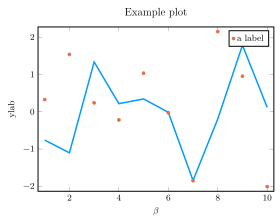

In [6]:
plot(randn(10), xlabel=L"\beta", ylabel="ylab", title="Example plot", size=(400,300))
scatter!(randn(10), label="a label")

## Glauber uniform J, Erdos-Renyi

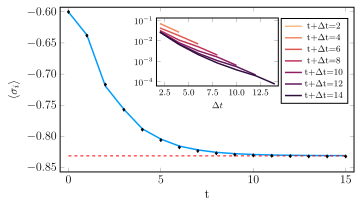

In [46]:
fn = "glauber_erdos_renyi"
data = load("plot_data/"*fn*".jld2")
@unpack T, m_mc, m_avg, m_std, m_eq, c_avg, c_std = data

resize_factor = 1.0
fs = 12

pl = plot(ylims=(-0.85,-0.6), size=resize_factor.*(500,300), xlabel="t", ylabel=L"\langle\sigma_i\rangle", 
    legend=false)
plot!(pl, 0:T, m_avg, c=myblue, label="MPBP")
plot!(pl, 0:T, mean(m_mc), label="sample mean", c=:black, m=:diamond, ms=2, msc=:auto, st=:scatter)
plot!(pl, [0,T], [-m_eq.val, -m_eq.val], label="equilibrium", c=:red, ls=:dash, lw=1, 
    tickfontsize=fs, labelfontsize=fs+1)
skip_even = true

plot!(pl, inset=(1, bbox(0.28, 0.05, 0.5, 0.55)), subplot=2)
pl_autocov = plot_autocovs!(pl[2], c_avg; us=2:2:T, skip_even, yaxis=:log10, legend=:outertopright)
plot!(pl[2], ylabel="", yticks=(10.0.^(-4:1:-1), [L"10^{%$x}" for x in -4:1:-1]))
pl

In [47]:
savefig(pl, "plot_outputs/"*fn*".pdf");

## Glauber uniform J on infinite 8-regular graph

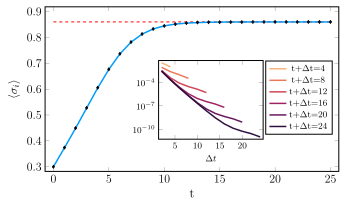

In [48]:
fn = "glauber_infinite8RRG_smallbeta"
data = load("plot_data/"*fn*".jld2")
@unpack T, k, m_mc, m, m_eq, c = data

resize_factor = 1.0
fs = 12

pl = plot([0,T], [m_eq, m_eq], c=:red, ls=:dash, lw=1, label="equilibrium", ylims=(0.3,0.9),
    size=resize_factor.*(500,300), tickfontsize=fs, labelfontsize=fs+1)
# plot!(pl, 0:T, sample(m_mc, 10^2), label=permutedims(["samples"; fill("", 10^2-1)]), c=:gray, 
#     lw=0.2, la=0.5)
plot!(pl, 0:T, mean(m_mc), label="sample mean", c=:black, m=:diamond, ms=2, msc=:auto, 
    st=:scatter)
pl = plot!(pl, 0:T, m, xlabel="t", ylabel=L"\langle\sigma_i\rangle", label="MPBP",
    xticks=0:5:T, ms=3, c=myblue, legend=false)

skip_even = true

plot!(pl, inset=(1, bbox(0.33, 0.25, 0.45, 0.6)), subplot=2)
pl_autocov = plot_autocovs!(pl[2], c; us=4:4:T, skip_even, yaxis=:log10, legend=:outertopright)
plot!(pl[2], ylabel="", yticks=(10.0.^(-10:3:-2), [L"10^{%$x}" for x in -10:3:-2]))
pl

In [49]:
savefig(pl, "plot_outputs/"*fn*".pdf");

## Glauber RFIM

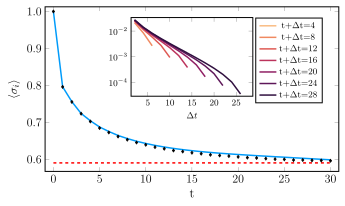

In [50]:
fn = "glauber_RFIM"
data = load("plot_data/"*fn*".jld2")
@unpack T, m, m_mc_eq, c = data

resize_factor = 1.0
fs = 12

pl = plot(ylims=(0.58,1), size=resize_factor.*(500,300), ylabel=L"\langle\sigma_i\rangle")
plot!(pl, 0:T, mean(m_mc_eq)[1:T+1], label="sample mean", c=:black, m=:diamond, ms=2, msc=:auto, st=:scatter)
plot!(pl, 0:T, m, xlabel="t", c=myblue, tickfontsize=fs, labelfontsize=fs+1,
    xticks=0:5:T, label="MPBP", legend=false)
plot!(pl, [0,T], [mean(m_mc_eq)[end], mean(m_mc_eq)[end]], c=:red, ls=:dash)

ci = map(x -> x > 1e-16 ? x : NaN, mean(c))
skip_even = true

plot!(pl, inset=(1, bbox(0.25, 0.05, 0.5, 0.6)), subplot=2)
pl_autocov = plot_autocovs!(pl[2], ci; us=4:4:T, skip_even, yaxis=:log10, legend=:outertopright)
plot!(pl[2], ylabel="", yticks=(10.0.^(-4:-2), [L"10^{%$x}" for x in -4:-2]))
pl

In [51]:
savefig(pl, "plot_outputs/"*fn*".pdf");

## Glauber Large Deviations

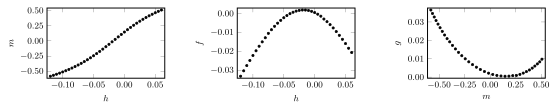

In [76]:
fn = "glauber_large_deviations"
data = load("plot_data/"*fn*".jld2")
@unpack T, J, β, m⁰, hs, magnetizs, ms, fs, gs = data

resize_factor = 0.7

# cg = cgrad(:matter, length(hs), categorical=true) .|> RGB
cg = fill(:black, length(hs))

pl1 = plot(hs, ms, label="", xlabel=L"h", ylabel=L"m", st=:scatter, c=cg, 
    size=resize_factor.*sz, ms=1.5)
pl2 = plot(hs, fs, label="", xlabel=L"h", ylabel=L"f", st=:scatter, c=cg, 
    size=resize_factor.*sz, ms=1.5)
pl3 = plot(ms, gs, label="", xlabel=L"m", ylabel=L"g", st=:scatter, c=cg, 
    size=resize_factor.*sz, ms=1.5)

plot(pl1, pl2, pl3, layout=(1,3), size=(800,200), margin=5Plots.mm)

In [77]:
savefig(pl1, "plot_outputs/"*fn*"_a.pdf")
savefig(pl2, "plot_outputs/"*fn*"_b.pdf")
savefig(pl3, "plot_outputs/"*fn*"_c.pdf");

## SIS comparison SoftMargin

In [121]:
fn = "sis_softmargin"
data = load("plot_data/"*fn*".jld2")
@unpack T, N, p_bp, p_mc, observed_sites = data

pls = Vector{Plots.Plot}(undef, N)
ylims=(0,1)
xt=2:3:T; yt=0:0.5:1
for i in eachindex(pls)
    xticks = i in 17:23 ? xt : (xt, fill("", length(xt)))
    yticks = i in (1,10,17) ? yt : (yt, fill("", length(yt)))
    pls[i] = plot(0:T, p_bp[i]; ylims, xticks, yticks,
        titlefontsize=8, c=myblue, lw=1.5, title="i=$i", margin=-3Plots.mm)
    scatter!(pls[i], 0:T, p_mc[i], m=:diamond, c=:black, ms=2)
    if i ∈ observed_sites
        scatter!(pls[i], [T], [p_mc[i][end]], c=:red, ms=2, m=:diamond) 
    end
end
r = cor(reduce(vcat, p_bp), value.(reduce(vcat, p_mc)))
println("Correlation r=$r")

Correlation r=0.9971086678307501


In [122]:
pl = plot(pls..., layout=@layout([° ° ° ° ° ° ° ° °;° ° ° ° ° ° ° _ _;° ° ° ° ° ° ° _ _]), 
    size=(900,300));

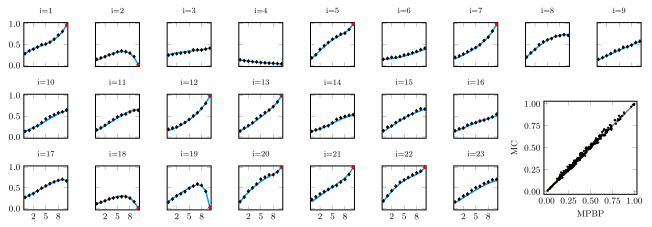

In [123]:
plot!(pl, inset=(1, bbox(7.1, 0.94, 2, 2)), subplot=length(pls)+1)
scatter!(pl[end], reduce(vcat, p_bp), reduce(vcat, p_mc), xlabel="MPBP", ylabel="MC", 
    ms=1, c=:black, legend=:bottomright)
plot!(pl[end], identity, label="", xlims=(0,1), ylims=(0,1), c=:gray)

In [124]:
savefig(pl, "plot_outputs/"*fn*".pdf");

## SIS karate club network

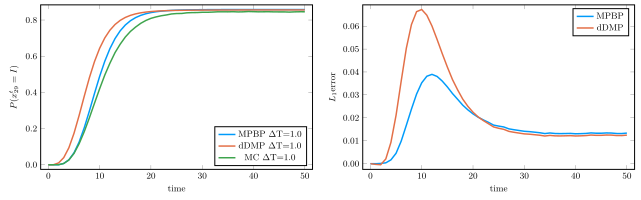

In [53]:
fn = "sis_karate_club_network"
data = load("plot_data/"*fn*".jld2")
@unpack T, ΔT, Δt, b_bp, p_bp, p_mc, p_mc_trimmed, Tdead, 
    p_dead_epidemic_mc, p_dmp_disc, p_dmp, p_cme, p_ibmf, p_gill, nT, c_bp, λ, ρ, svd_trunc = data

resize_factor = 1.0

i = 30

pl_disc = plot(xlabel="time", xticks=0:10:T, ylabel=L"P(x_{29}^t=I)", legend=:bottomright)
plot!(pl_disc, 0:ΔT:T, p_bp[i], label="MPBP ΔT=$(ΔT)")
plot!(pl_disc, 0:ΔT:T, p_dmp_disc[i], label="dDMP ΔT=$(ΔT)")
plot!(pl_disc, 0:ΔT:T, p_mc[i] .|> value, label="MC ΔT=$(ΔT)")

err_bp = mean(p_bp .- p_mc) .|> value
err_dmp_disc = mean(p_dmp_disc .- p_mc) .|> value
pl_err_disc = plot(xlabel="time", ylabel=L"L_1 \rm{error}", xticks=0:10:T)
plot!(pl_err_disc, 0:ΔT:T, err_bp, label="MPBP")
plot!(pl_err_disc, 0:ΔT:T, err_dmp_disc, label="dDMP")

plot(pl_disc, pl_err_disc, size=(900,300))

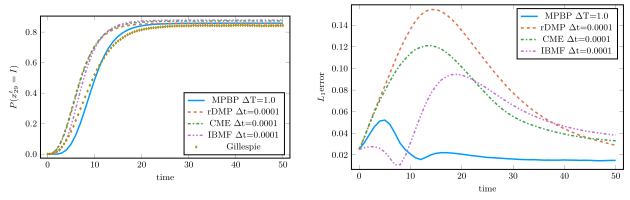

In [54]:
Δtplot = T/nT

pl = plot(xlabel="time", xticks=0:10:T, ylabel=L"P(x_{29}^t=I)", legend=:bottomright)
plot!(pl, 0:ΔT:T, p_bp[i], label="MPBP ΔT=$(ΔT)")
plot!(pl, 0:Δtplot:T, p_dmp[i], ls=:dash, label="rDMP Δt=$(Δt)")
plot!(pl, 0:Δtplot:T, p_cme[i], ls=:dashdot, label="CME Δt=$(Δt)")
plot!(pl, 0:Δtplot:T, p_ibmf[i], ls=:dashdotdot, label="IBMF Δt=$(Δt)")

plot!(pl, 0:Δtplot:T, p_gill[i], label="Gillespie", m=:diamond, st=:scatter, ms=1.5, msc=:auto)
plot!(pl, margin=5Plots.mm, legend=:bottomright)

err_bp = [mean(abs(p_bp[i][t]-p_gill[i][1:floor(Int, ΔT/Δtplot):end][t]) for i in eachindex(p_bp)) 
    for t in eachindex(p_bp[1])]
err_dmp = [mean(abs(p_dmp[i][t]-p_gill[i][t]) for i in eachindex(p_bp)) for t in eachindex(p_bp[1])]
err_cme = [mean(abs(p_cme[i][t]-p_gill[i][t]) for i in eachindex(p_bp)) for t in eachindex(p_bp[1])]
err_ibmf = [mean(abs(p_ibmf[i][t]-p_gill[i][t]) for i in eachindex(p_bp)) for t in eachindex(p_bp[1])]

pl_err = plot(0:ΔT:T, err_bp, label="MPBP ΔT=$(ΔT)", xlabel="time", ylabel=L"L_1 \rm{error}")
plot!(pl_err, 0:ΔT:T, err_dmp,  ls=:dash, label="rDMP Δt=$(Δt)")
plot!(pl_err, 0:ΔT:T, err_cme, ls=:dashdot, label="CME Δt=$(Δt)")
plot!(pl_err, 0:ΔT:T, err_ibmf, ls=:dashdotdot, label="IBMF Δt=$(Δt)")

plot(pl, pl_err, size=(900,300))

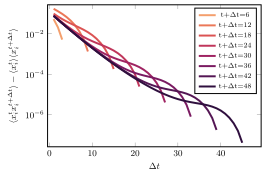

In [57]:
resize_factor = 1.0
c_bp29 = map(x -> x > 1e-14 ? x : NaN, c_bp[30])
pl_autocov = plot_autocovs(c_bp29; ΔT, yaxis=:log10, us=0:6:T,
    margin=5Plots.mm, lw=2, legend=:topright, legendfontsize=7, 
    size=sz.*resize_factor, yticks=(10.0.^(-6:2:-2), [L"10^{%$x}" for x in -6:2:-2]))

In [58]:
savefig(pl_disc, "plot_outputs/"*fn*"_discrete.pdf")
savefig(pl_err_disc , "plot_outputs/"*fn*"_discrete_err.pdf")
savefig(pl, "plot_outputs/"*fn*"_continuous.pdf")
savefig(pl_err, "plot_outputs/"*fn*"_continuous_err.pdf")
savefig(pl_autocov, "plot_outputs/"*fn*"_corr.pdf");

## SIRS inference single instance

Observations at times: [10]


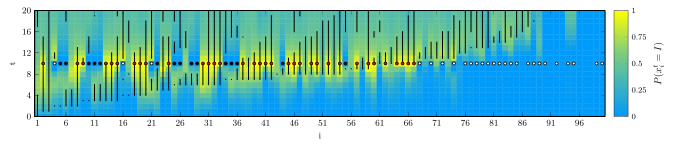

In [87]:
fn = "sis_inference_single_instance"
data = load("plot_data/"*fn*".jld2")
@unpack N, T, X, X_bp_sorted, true_infections_sorted, iperm, obs_times, c, λ, ρ, σ, γ, 
    observed, obs_fraction = data

resize_factor = 1.0

cg = cgrad([myblue, :yellow], 0.6)
pl = heatmap(1:N, 0:T, X_bp_sorted, c=cg, xlabel="i", ylabel="t", 
    colorbar_title=L"P(x_i^t=I)", yrange=(0,T), xticks=1:5:N)

for i in 1:N
    for a in true_infections_sorted[i]
        plot!(pl, [i,i], [a.start-0.1,a.stop+0.1], c=:black, label="", lw=1)
    end
end

cols = [:white, :red, :black]
for (i,t) in observed
    scatter!(pl, iperm[i:i], [t-1], ms=2, msc=:black, c=cols[X[i,t]], label="")
end

println("Observations at times: ", obs_times)
plot!(pl, yticks=0:(T÷5):T, widen=false, margin=5Plots.mm, size=(900,250).*resize_factor)

In [88]:
savefig(pl, "plot_outputs/"*fn*".pdf");